In [19]:
import os
import pandas as pd

df_list = []
for filename in os.listdir("/home/frankwoods/Desktop/lassie/data/mhxx_raw_data"):
    # creates dataframe holding entire csv
    df = pd.read_csv(f"/home/frankwoods/Desktop/lassie/data/mhxx_raw_data/{filename}")
    # takes just the two important columns
    df = df[['toeforce_y', 'toe_position_y']]
    df.columns = ["resistance", "depth"] # rename columns
    df_list.append(df)
print(f"example: {df_list[0]}")


example:        resistance     depth
0        3.591901 -0.166840
1        3.183853 -0.166840
2        3.839515 -0.166842
3        3.301737 -0.166842
4        3.676693 -0.166845
...           ...       ...
17747    4.151430 -0.160444
17748    5.946085 -0.160445
17749    7.428076 -0.160444
17750    3.787594 -0.160444
17751    4.444571 -0.160443

[17752 rows x 2 columns]


# Initial Data Visualization and Summary

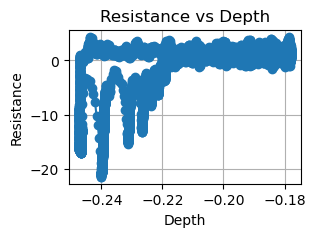

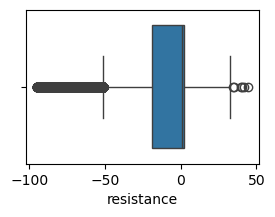

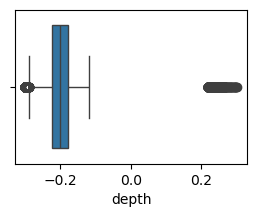

In [20]:


import seaborn as sns
import matplotlib.pyplot as plt

# ---- plot an example graph ----
# Assume you have a DataFrame df with columns 'depth' and 'resistance'
def visualize_data(df_list, graph=False, save_all_graphs=False, box_plots=False, histograms=False, graph_i=1):
    if graph:
        plt.figure(figsize=(3,2))         # Optional: set figure size
        plt.plot(df_list[graph_i]['depth'], df_list[graph_i]['resistance'], marker='o', linestyle='-')
        plt.xlabel('Depth')
        plt.ylabel('Resistance')
        plt.title('Resistance vs Depth')
        plt.grid(True)                    
        plt.show()
    
    if save_all_graphs:
        for i, df in enumerate(df_list):
            plt.figure(figsize=(3,2))         # Optional: set figure size
            plt.plot(df['depth'], df['resistance'], marker='o', linestyle='-')
            plt.xlabel('Depth (m)')
            plt.ylabel('Resistance (N)')
            plt.title('Resistance vs Depth')
            plt.grid(True)
            plt.savefig(f"data/mhxx_raw_data_visual/depth_res_{i}")
            plt.close()

    df_combined_row_wise = pd.concat(df_list, axis=0)
    if box_plots:
        plt.figure(figsize=(3,2))         # Optional: set figure size
        # ---- resistance ----
        sns.boxplot(x=df_combined_row_wise['resistance'])
        plt.show()
        resistance_series = df_combined_row_wise['resistance']
        # ---- depth ----
        plt.figure(figsize=(3,2))         # Optional: set figure size
        sns.boxplot(x=df_combined_row_wise['depth'])
        plt.show()
    if histograms:
        plt.hist(df_combined_row_wise["resistance"], bins=30, density=True)
        plt.title("Resistance Histogram")
        plt.show()

        plt.hist(df_combined_row_wise["depth"], bins=30, density=True)
        plt.title("Depth Histogram")
        plt.show()


visualize_data(df_list, graph=True, save_all_graphs=True, box_plots=True)

# Flip curve over y-axis and x-axis

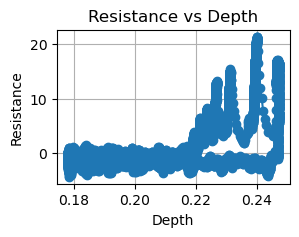

In [21]:
def flip_over_x_and_y_axis(df_list):
    cleaned_df_list = []
    for df in df_list:
        copy_df = df.copy()
        copy_df['depth'] = -copy_df['depth']
        copy_df['resistance'] = -copy_df['resistance']
        cleaned_df_list.append(copy_df)
    return cleaned_df_list

df_list = flip_over_x_and_y_axis(df_list)
visualize_data(df_list, graph=True)

# Remove bad samples

In [22]:
def remove_bad_samples(df_list, remove_list):
    cleaned_samples_list = []
    for i, df in enumerate(df_list):
        if i not in remove_list:
            cleaned_samples_list.append(df)
    return cleaned_samples_list

remove_list = [0, 14, 19, 23, 26, 35, 36, 37, 38, 39, 45, 46, 47, 49, 50, 53, 58, 65, 74, 79]
remove_bad_samples(df_list, remove_list)

[       resistance     depth
 0       -1.732032  0.178025
 1       -0.910094  0.178029
 2       -1.679498  0.178038
 3       -1.167706  0.178047
 4       -1.732541  0.178028
 ...           ...       ...
 13604   -1.347322  0.178465
 13605   -1.478357  0.178467
 13606   -1.761743  0.178467
 13607   -1.036387  0.178463
 13608   -1.557017  0.178467
 
 [13609 rows x 2 columns],
        resistance     depth
 0       -0.982821  0.215960
 1       -0.831255  0.215955
 2       -0.733809  0.215950
 3       -0.733112  0.215949
 4       -0.688956  0.215951
 ...           ...       ...
 11708   -2.404115  0.185957
 11709   -1.976250  0.185956
 11710   -3.070695  0.185956
 11711   -2.420043  0.185959
 11712   -2.373043  0.185956
 
 [11713 rows x 2 columns],
        resistance     depth
 0       -0.523149  0.249566
 1       -0.352474  0.249560
 2       -0.344070  0.249563
 3       -0.811343  0.249565
 4       -0.270059  0.249564
 ...           ...       ...
 13434   -2.229293  0.220439
 13435   -2.07